In [2]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv("BostonHousing.csv")

In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Set features(X) and target(y)
X = data.drop('medv', axis = 1)
y = data['medv']

In [6]:
# Initialize Linear Regression Model
reg = linear_model.LinearRegression()

In [7]:
# Split data 67% training and 33% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
# trian the mmodel with training data 

reg.fit(X_train, y_train)

LinearRegression()

In [9]:
print(reg.coef_)

[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]


In [10]:
# print predecttions of test data

y_pred = reg.predict(X_test)
print(y_pred)

[28.53469469 36.6187006  15.63751079 25.5014496  18.7096734  23.16471591
 17.31011035 14.07736367 23.01064388 20.54223482 24.91632351 18.41098052
 -6.52079687 21.83372604 19.14903064 26.0587322  20.30232625  5.74943567
 40.33137811 17.45791446 27.47486665 30.2170757  10.80555625 23.87721728
 17.99492211 16.02608791 23.268288   14.36825207 22.38116971 19.3092068
 22.17284576 25.05925441 25.13780726 18.46730198 16.60405712 17.46564046
 30.71367733 20.05106788 23.9897768  24.94322408 13.97945355 31.64706967
 42.48057206 17.70042814 26.92507869 17.15897719 13.68918087 26.14924245
 20.2782306  29.99003492 21.21260347 34.03649185 15.41837553 25.95781061
 39.13897274 22.96118424 18.80310558 33.07865362 24.74384155 12.83640958
 22.41963398 30.64804979 31.59567111 16.34088197 20.9504304  16.70145875
 20.23215646 26.1437865  31.12160889 11.89762768 20.45432404 27.48356359
 10.89034224 16.77707214 24.02593714  5.44691807 21.35152331 41.27267175
 18.13447647  9.8012101  21.24024342 13.02644969 21.

In [11]:
# print  actual values
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: medv, Length: 167, dtype: float64


In [12]:
# check model accuracy usin mean squared error
print(mean_squared_error(y_test, y_pred))

20.724023437339817


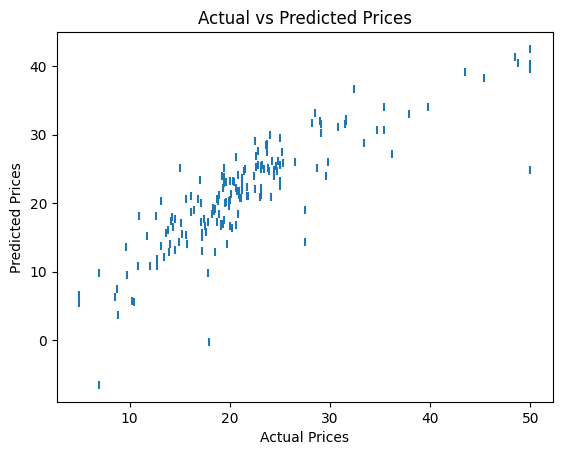

In [13]:
#Visualize predictions
plt.scatter(y_test, y_pred, marker="|")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

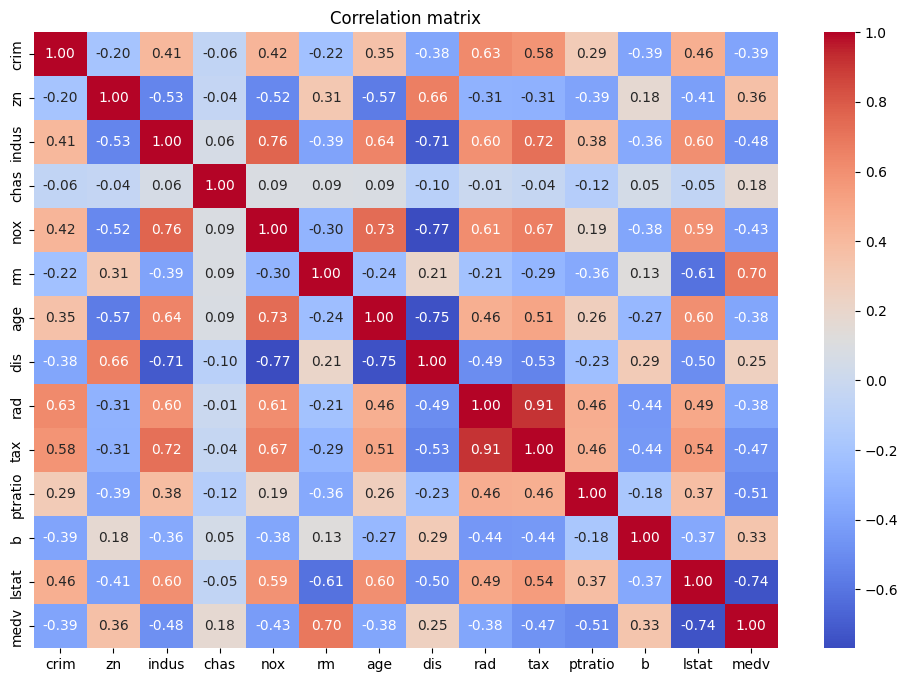

In [14]:
# Correlation matrix for heatmap
corr_matrix = data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")
plt.show